<a href="https://colab.research.google.com/github/rohithpk12/project-final/blob/main/From_Data_to_Decisions_AQS_EDA_and_Visualization_for_Effective_Air_Quality_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import require python classes and packages
import pandas as pd #pandas to read and explore dataset
import numpy as np
import matplotlib.pyplot as plt #use to visualize dataset vallues
import seaborn as sns
import plotly.express as px
import geopandas as gpd #can be use to plot maps
from geopandas import GeoDataFrame
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm #SVM class
from sklearn.model_selection import GridSearchCV #grid class for tuning each algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading first dataset
data1 = pd.read_csv("/content/drive/MyDrive/DATASETS/epa_air_quality_annual_summary.csv", low_memory=False)
data1

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,seventy_five_percentile,fifty_percentile,ten_percentile,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
0,20,57,1,82134,1,37.771964,-100.018190,WGS84,Molybdenum PM10 STP,24 HOUR,...,0.00000,0.000,0.000,DODGE CITY,PUMP STATION 2100 1ST AVE,Kansas,Ford,Dodge City,Dodge City KS,2012-08-11
1,18,163,12,42401,1,38.021727,-87.569458,WGS84,Sulfur dioxide,3-HR BLK AVG,...,3.60000,1.300,0.000,Evansville CAAP,425 WEST MILL ROAD/ FIRE STATION #17,Indiana,Vanderburgh,Evansville,Evansville IN-KY,2013-02-16
2,40,31,9000,88152,1,34.732404,-98.713351,WGS84,Phosphorus PM2.5 LC,24 HOUR,...,0.00000,0.000,0.000,NaN,Wichita Mountains,Oklahoma,Comanche,NaN,Lawton OK,2016-02-26
3,32,3,561,42601,1,36.163959,-115.113916,WGS84,Nitric oxide (NO),1 HOUR,...,18.80000,0.900,0.000,Sunrise Acres,2501 SUNRISE AVENUE,Nevada,Clark,Las Vegas,Las Vegas-Henderson-Paradise NV,2015-03-20
4,13,127,3001,12154,1,31.185187,-81.485166,WGS84,Selenium (TSP) STP,24 HOUR,...,0.00064,0.000,0.000,NaN,BRUNSWICK COASTAL COLLEGE,Georgia,Glynn,Brunswick,Brunswick GA,2015-07-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038705,06,13,1002,43802,3,38.006311,-121.641918,WGS84,Dichloromethane,24 HOUR,...,0.00000,0.000,0.000,Bethel Island,5551 BETHEL ISLAND RD,California,Contra Costa,Bethel Island,San Francisco-Oakland-Hayward CA,2012-09-28
2038706,25,25,42,43291,11,42.329500,-71.082600,WGS84,23-Dimethylpentane,24 HOUR,...,0.10000,0.100,0.100,DUDLEY SQUARE ROXBURY,HARRISON AVE,Massachusetts,Suffolk,Boston,Boston-Cambridge-Newton MA-NH,2016-06-22
2038707,06,85,2009,43702,3,37.318435,-122.069705,WGS84,Acetonitrile,24 HOUR,...,0.00000,0.000,0.000,Cupertino Monta Vista,22601 Voss Ave,California,Santa Clara,Cupertino,San Jose-Sunnyvale-Santa Clara CA,2014-04-29
2038708,13,89,2,88374,5,33.687970,-84.290480,WGS84,OC1 CSN_Rev Unadjusted PM2.5 LC,24 HOUR,...,0.30400,0.134,0.036,South DeKalb,2390-B Wildcat Road Decatur GA 30034,Georgia,DeKalb,NaN,Atlanta-Sandy Springs-Roswell GA,2016-03-08


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#loading 2018 dataset as data2
data2 = pd.read_csv("/content/drive/MyDrive/DATASETS/annual_conc_by_monitor_2018.csv", low_memory=False)
data2

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,1 HOUR,...,0.054,0.044,0.030,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-11-03
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.049,0.039,0.026,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-11-03
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.049,0.039,0.026,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-11-03
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.048,0.039,0.026,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-11-03
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.600,6.600,4.000,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73426,80,2,24,85101,1,32.654420,-115.407267,NAD83,PM10 - LC,24 HOUR,...,101.000,71.000,42.000,NaN,Calzada Cetys,Country Of Mexico,BAJA CALIFORNIA NORTE,Mexicali,NaN,2020-05-21
73427,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,1 HOUR,...,0.055,0.046,0.036,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2021-11-05
73428,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.048,0.041,0.030,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2021-11-05
73429,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.048,0.041,0.030,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2021-11-05


In [5]:
#loading 2019 dataset as data3
data3 = pd.read_csv("/content/drive/MyDrive/DATASETS/annual_conc_by_monitor_2019.csv", low_memory=False)
data3

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,1 HOUR,...,0.054,0.045,0.029,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-11-01
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.050,0.040,0.026,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-11-01
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.050,0.040,0.026,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-11-01
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.050,0.040,0.026,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-11-01
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.500,7.300,3.800,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68550,80,2,24,85101,1,32.654420,-115.407267,NAD83,PM10 - LC,24 HOUR,...,55.000,38.000,18.000,NaN,Calzada Cetys,Country Of Mexico,BAJA CALIFORNIA NORTE,Mexicali,NaN,2020-05-21
68551,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,1 HOUR,...,0.057,0.051,0.038,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2021-11-03
68552,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.053,0.046,0.032,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2021-11-03
68553,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.053,0.046,0.032,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2021-11-03


In [6]:
#loading 2020 dataset as data 4
data4 = pd.read_csv("/content/drive/MyDrive/DATASETS/annual_conc_by_monitor_2020.csv", low_memory=False)
data4

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,1 HOUR,...,0.048,0.041,0.025,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-10-30
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.044,0.036,0.024,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-10-30
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.044,0.036,0.024,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-10-30
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.044,0.036,0.024,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-10-30
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,10.300,7.400,3.800,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2021-10-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68288,80,2,14,88502,5,32.633671,-115.504995,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24 HOUR,...,0.000,0.000,0.000,"COBACH, CALLE GUADALAJARA JUST SOUTH OF AVENID...","COBACH, COLEGIO DE BACHILLERES, MEXICALI",Country Of Mexico,BAJA CALIFORNIA NORTE,Mexicali,NaN,2021-04-01
68289,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,1 HOUR,...,0.055,0.048,0.039,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2021-11-01
68290,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.050,0.044,0.033,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2021-11-01
68291,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.050,0.044,0.033,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2021-11-01


In [7]:
#loading 2021 dataset as data5
data5 = pd.read_csv("/content/drive/MyDrive/DATASETS/annual_conc_by_monitor_2021.csv", low_memory=False, error_bad_lines=False, encoding='iso-8859-1')
data5

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,1 HOUR,...,0.049,0.043,0.028,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-02-24
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.045,0.038,0.025,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-02-24
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.045,0.038,0.025,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-02-24
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.045,0.038,0.024,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-02-24
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.800,6.500,4.300,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92815,80,2,14,88502,5,32.633671,-115.504995,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24 HOUR,...,0.000,0.000,0.000,"COBACH, CALLE GUADALAJARA JUST SOUTH OF AVENID...","COBACH, COLEGIO DE BACHILLERES, MEXICALI",Country Of Mexico,BAJA CALIFORNIA NORTE,Mexicali,NaN,2022-04-26
92816,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,1 HOUR,...,0.049,0.043,0.035,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2022-01-14
92817,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.042,0.037,0.030,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2022-01-14
92818,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.042,0.037,0.030,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2022-01-14


In [8]:
#loading 2022 dataset as data6
data6 = pd.read_csv("/content/drive/MyDrive/DATASETS/annual_conc_by_monitor_2022.csv", low_memory=False, error_bad_lines=False, encoding='iso-8859-1')
data6

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,1 HOUR,...,0.054,0.048,0.030,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.049,0.044,0.029,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.049,0.044,0.029,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.049,0.044,0.029,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.600,7.300,4.000,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51882,80,26,6,88101,1,31.291293,-110.951513,WGS84,PM2.5 - Local Conditions,24-HR BLK AVG,...,10.400,7.800,4.800,Nogales Sonora Institute ITN,"Avenida Instituto Tecnologico #911, Granja, 84...",Country Of Mexico,SONORA,NaN,NaN,2022-10-13
51883,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,1 HOUR,...,0.055,0.048,0.037,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2022-10-14
51884,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.050,0.043,0.033,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2022-10-14
51885,80,26,8012,44201,1,32.466389,-114.768611,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.050,0.043,0.033,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2022-10-14


In [9]:
#now merging all datasets from data1 to data6 as single dataset
dataset = pd.concat([data1, data2, data3, data4, data5, data6])
dataset

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,20,57.0,1.0,82134.0,1.0,37.771964,-100.018190,WGS84,Molybdenum PM10 STP,24 HOUR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,163.0,12.0,42401.0,1.0,38.021727,-87.569458,WGS84,Sulfur dioxide,3-HR BLK AVG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40,31.0,9000.0,88152.0,1.0,34.732404,-98.713351,WGS84,Phosphorus PM2.5 LC,24 HOUR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32,3.0,561.0,42601.0,1.0,36.163959,-115.113916,WGS84,Nitric oxide (NO),1 HOUR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,127.0,3001.0,12154.0,1.0,31.185187,-81.485166,WGS84,Selenium (TSP) STP,24 HOUR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.400,7.800,4.800,Nogales Sonora Institute ITN,"Avenida Instituto Tecnologico #911, Granja, 84...",Country Of Mexico,SONORA,NaN,NaN,2022-10-13
51883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.055,0.048,0.037,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2022-10-14
51884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.050,0.043,0.033,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2022-10-14
51885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.050,0.043,0.033,San Luis Rio Colorado Well 10,Calle 15 & Venustiano Carranza Water Well #10,Country Of Mexico,SONORA,NaN,NaN,2022-10-14


In [ ]:
#finding and displaying count of missing or null values
dataset.isnull().sum()

state_code              354986
county_code             354986
site_num                354986
parameter_code          354986
poc                     354986
                        ...   
State Name             2038710
County Name            2038710
City Name              2107898
CBSA Name              2071334
Date of Last Change    2038710
Length: 110, dtype: int64

In [ ]:
#replacing missing values with 0 and then finding sum of missing values
dataset.fillna(0, inplace = True)
dataset.isnull().sum()

state_code             0
county_code            0
site_num               0
parameter_code         0
poc                    0
                      ..
State Name             0
County Name            0
City Name              0
CBSA Name              0
Date of Last Change    0
Length: 110, dtype: int64

In [ ]:
#detect & remove outliers or anomalies from dataset
low = dataset.quantile(0.25)
high = dataset.quantile(0.75)
IQR = high - low
print("Dataset Size Before Removing Outliers : "+str(dataset.shape[0]))
#remove all anomalies which are failed to satisfy and high and low threshold
dataset = dataset[~((dataset < (low - 1.5 * IQR)) |(dataset > (high + 1.5 * IQR))).any(axis=1)]
print("Dataset Size After Removing Outliers : "+str(dataset.shape[0]))

Dataset Size Before Removing Outliers : 2393696
Dataset Size After Removing Outliers : 475792


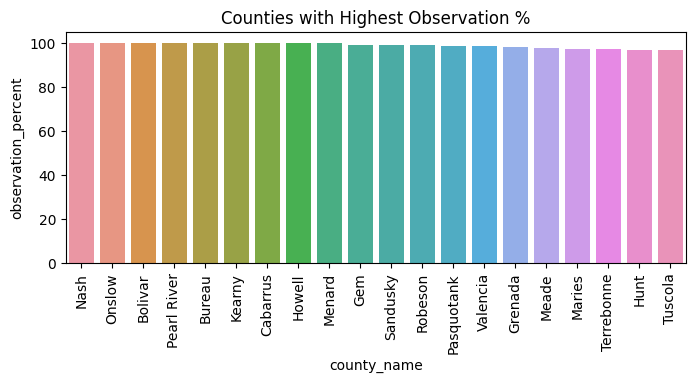

In [ ]:
#using this plot we are finding top 20 county names with highest number of aairr quality observation %
countries_with_highest_measure = (dataset.groupby('county_name')['observation_percent'].mean().sort_values(ascending=False).head(20)).reset_index()
plt.figure(figsize=(8,3))
sns.barplot(x='county_name',y='observation_percent', data=countries_with_highest_measure)
plt.title('Counties with Highest Observation %')
plt.xticks(rotation=90)
plt.show()

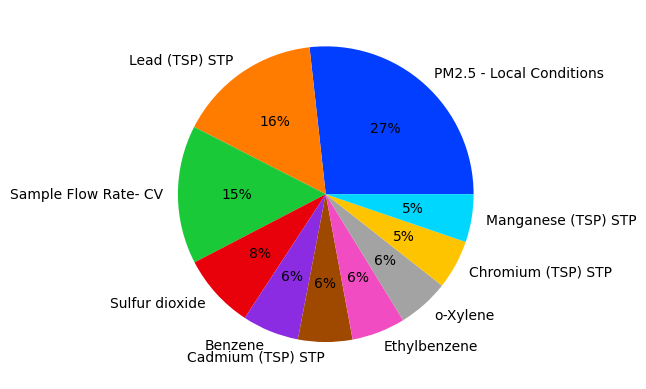

In [ ]:
data = dataset[['city_name', 'parameter_name']]
cities_with_highest_measure = data.groupby(['parameter_name'])['city_name'].count().reset_index()
countries_with_highest_measure = (cities_with_highest_measure.groupby('parameter_name')['city_name'].sum().sort_values(ascending=False).head(10)).reset_index()
palette_color = sns.color_palette('bright')
plt.pie(countries_with_highest_measure['city_name'].ravel(),labels=countries_with_highest_measure['parameter_name'].ravel(),colors=palette_color, autopct='%.0f%%')
plt.show()

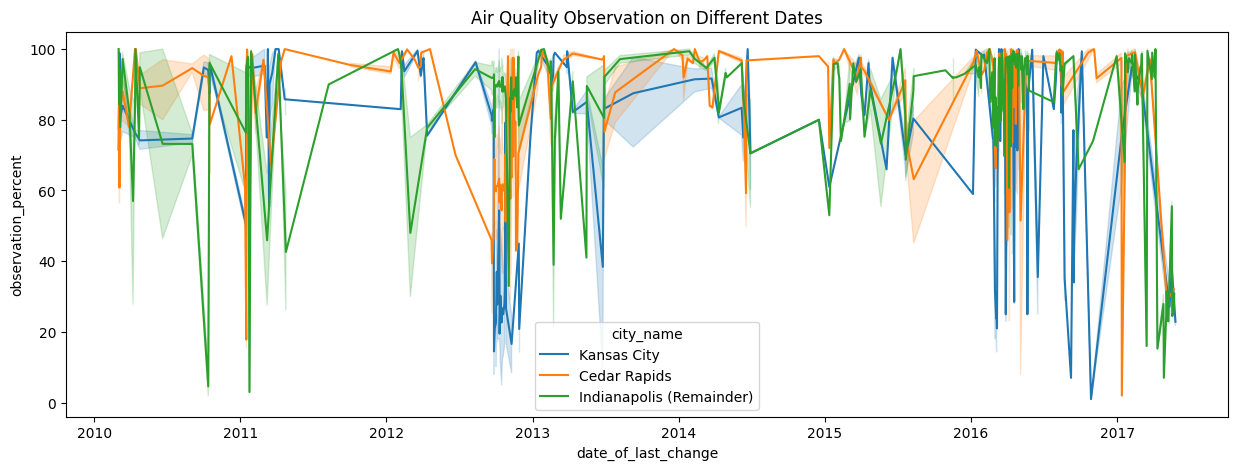

In [11]:
data = dataset.loc[((dataset['city_name'] == 'Cedar Rapids') | (dataset['city_name'] == 'Kansas City') | (dataset['city_name'] == 'Indianapolis (Remainder)'))]
data["date_of_last_change"] = pd.to_datetime(data["date_of_last_change"])
data.sort_values(by='date_of_last_change', inplace = True)

fig, ax = plt.subplots(figsize=(15, 5))
graph = sns.lineplot(x="date_of_last_change", y="observation_percent", ax=ax, data=data, hue='city_name')
graph.set(title="Air Quality Observation on Different Dates")
plt.show()

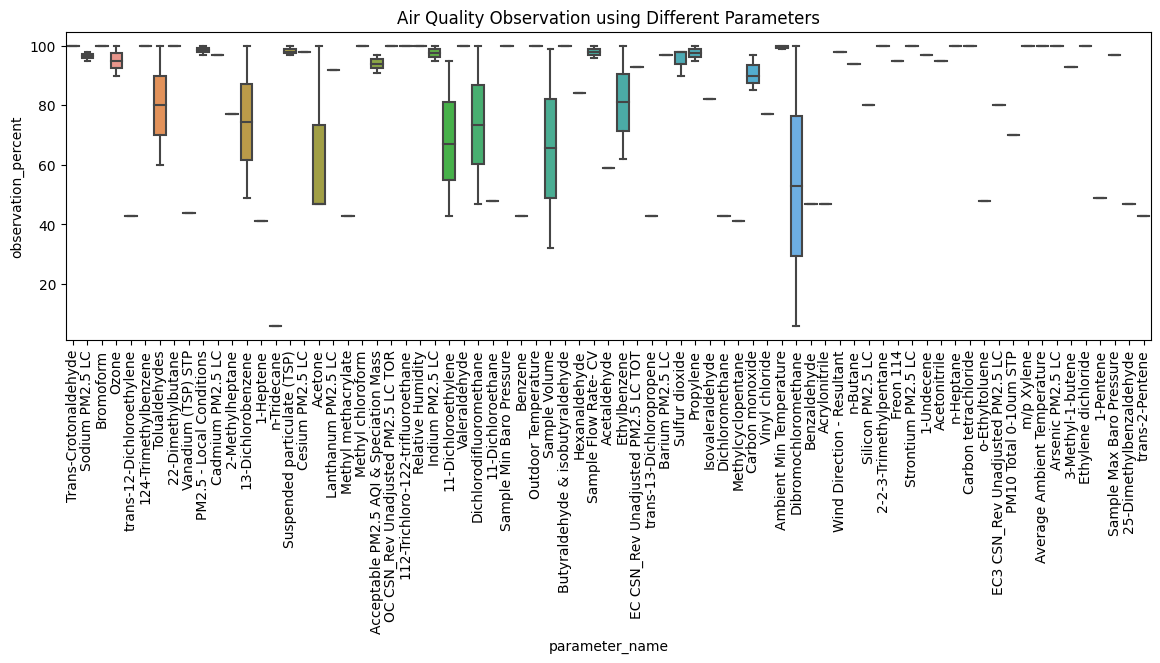

In [15]:
temp = dataset.loc[((dataset['city_name'] == 'Cedar Rapids'))]
fig, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(data=temp[0:100], x="parameter_name", y="observation_percent")
plt.xticks(rotation=90)
plt.title("Air Quality Observation using Different Parameters")
plt.show()

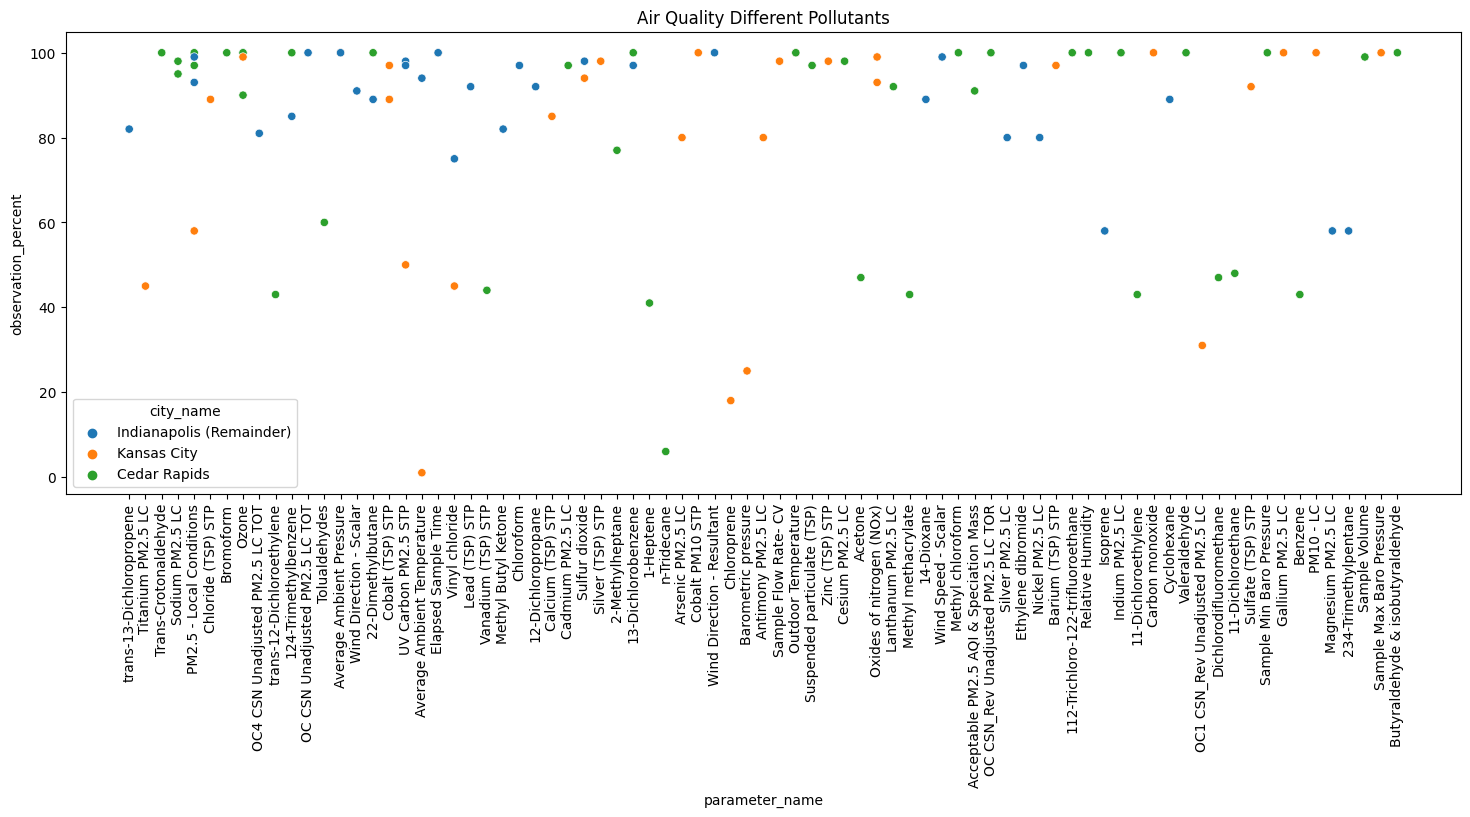

In [17]:
#data = dataset.loc[((dataset['city_name'] == 'Cedar Rapids'))]
data = dataset.loc[((dataset['city_name'] == 'Cedar Rapids') | (dataset['city_name'] == 'Kansas City') | (dataset['city_name'] == 'Indianapolis (Remainder)'))]
data["date_of_last_change"] = pd.to_datetime(data["date_of_last_change"])
fig, ax = plt.subplots(figsize=(18, 6))
graph = sns.scatterplot(y="observation_percent", x="parameter_name", data=data[0:100], hue="city_name")
graph.set(title="Air Quality Different Pollutants")
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig = px.scatter_geo(dataset[0:1000],lat='latitude',lon='longitude', hover_name="city_name")
fig.update_layout(title = 'Stations Located in Different Cities', title_x=0.5)
fig.show()

In [21]:
import plotly.graph_objects as go
fig = px.scatter_geo(dataset[0:1000],lat='latitude',lon='longitude', hover_name="parameter_name")
fig.update_geos(
    visible=True, resolution=50, scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(title='Air Quality Sensing in Differernt locations')
fig.show()

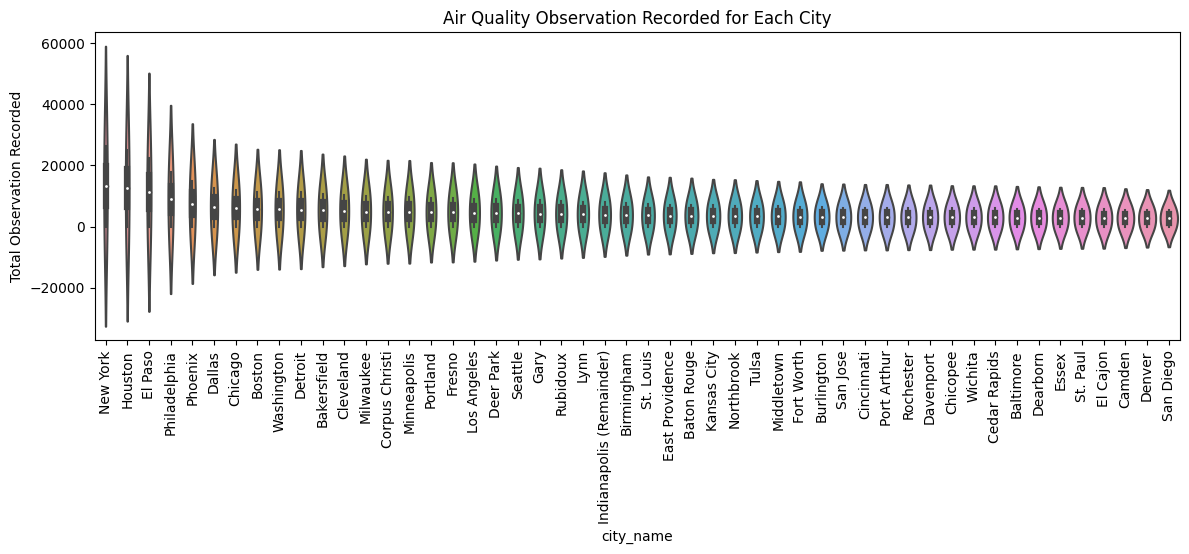

In [25]:
cities = dataset['city_name'].value_counts().reset_index()
cities = cities.values
values = []
for i in range(len(cities)):
    if cities[i,0] != 0 and cities[i,1] > 150 and cities[i,0] != 'Not in a city':
        values.append([cities[i,0], 0])
        values.append([cities[i,0], cities[i,1]])
cities = pd.DataFrame(values, columns=['city_name', 'Total Observation Recorded'])
fig, ax = plt.subplots(figsize=(14, 4))
sns.violinplot(data=cities[0:100], x="city_name", y="Total Observation Recorded")
plt.xticks(rotation=90)
plt.title("Air Quality Observation Recorded for Each City")
plt.show()

In [ ]:
#dataset cleaning by converting non-numeric data into numeric data
#now convert date column as numeric features by separting them into year, month, day, hour, second and minutes
dataset['date_of_last_change'] = pd.to_datetime(dataset['date_of_last_change'])
dataset['year_value'] = dataset['date_of_last_change'].dt.year
dataset['month'] = dataset['date_of_last_change'].dt.month
dataset['day'] = dataset['date_of_last_change'].dt.day
dataset['hour'] = dataset['date_of_last_change'].dt.hour
dataset['minute'] = dataset['date_of_last_change'].dt.minute
dataset['second'] = dataset['date_of_last_change'].dt.second
dataset.drop(['date_of_last_change'], axis = 1,inplace=True)
#converting non-numeric data to numeric values
label_encoder = []
columns = dataset.columns
types = dataset.dtypes.values
for i in range(len(types)):
    name = types[i]
    if name == 'object': #finding column with object type
        le = LabelEncoder()
        dataset[columns[i]] = pd.Series(le.fit_transform(dataset[columns[i]].astype(str)))#encode all str columns to numeric
        label_encoder.append(le)
dataset.fillna(0, inplace = True)
print("Dataset After Cleaning & Processing")
dataset

Dataset After Cleaning & Processing


,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,County Name,City Name,CBSA Name,Date of Last Change,year_value,month,day,hour,minute,second
0,15.0,57.0,1.0,82134.0,1.0,37.771964,-100.018190,1.0,542.0,5.0,...,0.0,0.0,0.0,0.0,2012,8,11,0,0,0
8,48.0,101.0,4.0,45201.0,2.0,40.008889,-75.097780,1.0,46.0,5.0,...,0.0,0.0,0.0,0.0,2015,7,22,0,0,0
9,21.0,41.0,1.0,43815.0,3.0,37.972310,-122.520004,1.0,409.0,5.0,...,0.0,0.0,0.0,0.0,2012,10,12,0,0,0
12,44.0,167.0,9.0,12132.0,1.0,39.377038,-81.537145,1.0,406.0,5.0,...,0.0,0.0,0.0,0.0,2010,3,6,0,0,0
13,29.0,91.0,5.0,12110.0,1.0,34.963013,-81.000894,1.0,313.0,5.0,...,0.0,0.0,0.0,0.0,2012,9,24,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038681,0.0,71.0,1.0,88167.0,1.0,43.745610,-101.941218,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2014,7,31,0,0,0
2038694,0.0,139.0,1044.0,43232.0,1.0,32.175417,-96.870189,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2016,3,4,0,0,0
2038704,0.0,163.0,33.0,43504.0,1.0,42.306674,-83.148754,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2015,7,22,0,0,0
2038705,0.0,13.0,1002.0,43802.0,3.0,38.006311,-121.641918,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2012,9,28,0,0,0


In [ ]:
#Extracting X training features and Y label
Y = dataset['observation_percent'].ravel()
Y = Y.reshape(-1, 1)
dataset.drop(['observation_percent'], axis = 1,inplace=True)
X = dataset.values
#normalizing training features and labels
sc1 = MinMaxScaler(feature_range = (0, 1))
sc2 = MinMaxScaler(feature_range = (0, 1))
X = sc1.fit_transform(X)#normalize train features
Y = sc2.fit_transform(Y)
print("Normalized Features")
print(X)

Normalized Features
[[0.28301887 0.24137931 0.         ... 0.         0.         0.        ]
 [0.90566038 0.43103448 0.00125    ... 0.         0.         0.        ]
 [0.39622642 0.17241379 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.69827586 0.01333333 ... 0.         0.         0.        ]
 [0.         0.05172414 0.41708333 ... 0.         0.         0.        ]
 [0.         0.36206897 0.83666667 ... 0.         0.         0.        ]]


In [ ]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print("Total records found in dataset = "+str(X.shape[0]))
print("Total features found in dataset= "+str(X.shape[1]))
print("80% dataset for training : "+str(X_train.shape[0]))
print("20% dataset for testing  : "+str(X_test.shape[0]))

Total records found in dataset = 475792
Total features found in dataset= 114
80% dataset for training : 380633
20% dataset for testing  : 95159


In [ ]:
#define global variables to calculate MSE and RMSE values where MSE and RMSE refers as difference between true traffic
#values and predicted traffic values so the lower the difference the better is the model
mse = []
rmse = []

In [ ]:
#function to calculate MSE and other metrics
def calculateMetrics(algorithm, predict, test_labels):
    mse_value = mean_squared_error(test_labels, predict)
    rmse_value = sqrt(mse_value)
    predict = sc2.inverse_transform(predict)
    test_label = sc2.inverse_transform(test_labels)
    predict = predict.ravel()
    test_label = test_label.ravel()
    predict = predict[0:200]
    test_label = test_label[0:200]
    mse.append(mse_value)
    rmse.append(rmse_value)
    print(algorithm+" MSE  : "+str(mse_value))
    print(algorithm+" RMSE : "+str(rmse_value))
    print()
    for i in range(0, 20):
        print("True Observation Percent : "+str(test_label[i])+" Predicted Observation Percent : "+str(predict[i]))
    plt.figure(figsize=(5,3))
    plt.plot(test_label, color = 'red', label = 'True Air Quality Observation Values')
    plt.plot(predict, color = 'green', label = 'Predicted Air Quality Observation Values')
    plt.title(algorithm+' Air Quality Observation Prediction')
    plt.xlabel('Test Data')
    plt.ylabel('Predicted Air Quality Observation')
    plt.legend()
    plt.show()

Decision Tree MSE  : 0.007124493815220194
Decision Tree RMSE : 0.08440671664755237

True Observation Percent : 39.0 Predicted Observation Percent : 44.78507026933188
True Observation Percent : 33.0 Predicted Observation Percent : 40.65172413793185
True Observation Percent : 97.0 Predicted Observation Percent : 97.48430531455158
True Observation Percent : 97.0 Predicted Observation Percent : 97.48430531455158
True Observation Percent : 100.0 Predicted Observation Percent : 97.48430531455158
True Observation Percent : 1.0 Predicted Observation Percent : 1.1513400540939573
True Observation Percent : 69.0 Predicted Observation Percent : 75.25978061473123
True Observation Percent : 13.0 Predicted Observation Percent : 8.202055921052269
True Observation Percent : 82.0 Predicted Observation Percent : 75.25978061473123
True Observation Percent : 62.0 Predicted Observation Percent : 91.19073788736331
True Observation Percent : 89.0 Predicted Observation Percent : 89.38119754047673
True Observat

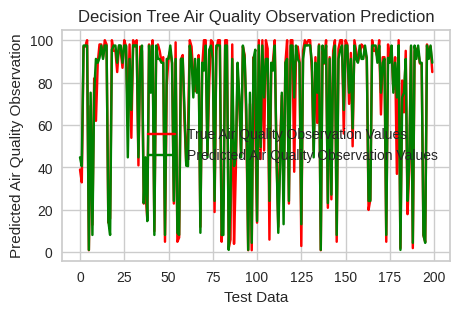

In [ ]:
#train decisoon tree algorithm by tuning its parameters
tuning_param = {'splitter' : ('best', 'random'), 'max_depth' : (2, 5)}
dt_cls = DecisionTreeRegressor() #creasting decision tree object
tuned_dt = GridSearchCV(dt_cls, tuning_param, cv=5)#defining decision tree with tuned parameters
tuned_dt.fit(X_train, y_train.ravel())#now train decision tree
predict = tuned_dt.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Decision Tree", predict, y_test) #evaluate Decision Tree model by calling caculate metrics function

SVM MSE  : 0.033029866438944046
SVM RMSE : 0.18174120732223623

True Observation Percent : 39.0 Predicted Observation Percent : 60.351799657568726
True Observation Percent : 33.0 Predicted Observation Percent : 63.58653961095037
True Observation Percent : 97.0 Predicted Observation Percent : 83.89701309342915
True Observation Percent : 97.0 Predicted Observation Percent : 88.83679983117572
True Observation Percent : 100.0 Predicted Observation Percent : 84.97630509401691
True Observation Percent : 1.0 Predicted Observation Percent : -45.25645036843845
True Observation Percent : 69.0 Predicted Observation Percent : 76.36496476506726
True Observation Percent : 13.0 Predicted Observation Percent : 54.47937965788089
True Observation Percent : 82.0 Predicted Observation Percent : 70.47068949688992
True Observation Percent : 62.0 Predicted Observation Percent : 72.56173917853957
True Observation Percent : 89.0 Predicted Observation Percent : 83.71628966814802
True Observation Percent : 98.0 

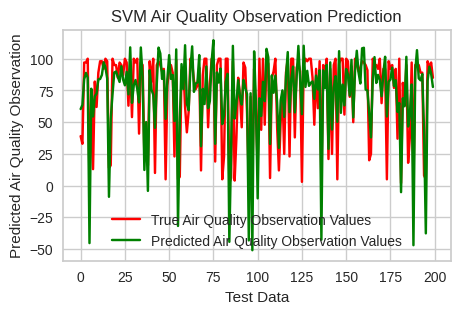

In [ ]:
#train SVM algorithm by tuning its parameters
tuning_param = {'kernel' : ['linear'], 'gamma' : ['auto']}
index = 30000
svm_cls = svm.SVR() #creasting SVM object
tuned_svm = GridSearchCV(svm_cls, tuning_param, cv=5)#defining svm with tuned parameters
tuned_svm.fit(X_train[0:index], y_train.ravel()[0:index])#now train SVM
predict = tuned_svm.predict(X_test[0:10000]) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("SVM", predict, y_test[0:10000]) #evaluate SVM model by calling caculate metrics function

Random Forest MSE  : 0.007230320549752061
Random Forest RMSE : 0.08503129159169617

True Observation Percent : 39.0 Predicted Observation Percent : 45.11
True Observation Percent : 33.0 Predicted Observation Percent : 41.03000000000002
True Observation Percent : 97.0 Predicted Observation Percent : 96.10999999999997
True Observation Percent : 97.0 Predicted Observation Percent : 91.71
True Observation Percent : 100.0 Predicted Observation Percent : 95.26
True Observation Percent : 1.0 Predicted Observation Percent : 30.419999999999998
True Observation Percent : 69.0 Predicted Observation Percent : 71.71999999999998
True Observation Percent : 13.0 Predicted Observation Percent : 18.990000000000006
True Observation Percent : 82.0 Predicted Observation Percent : 78.74999999999999
True Observation Percent : 62.0 Predicted Observation Percent : 82.61000000000006
True Observation Percent : 89.0 Predicted Observation Percent : 87.29000000000008
True Observation Percent : 98.0 Predicted Observ

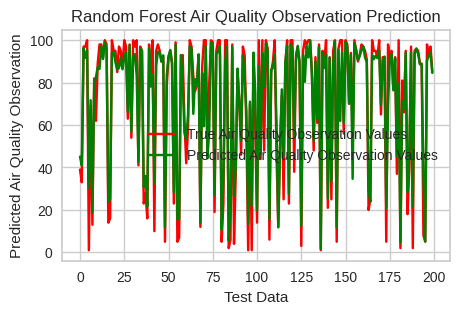

In [ ]:
#train RandomForest algorithm by tuning its parameters
tuning_param = {'n_estimators' : [100], 'max_features' : ['sqrt']}
rf_cls = RandomForestRegressor() #creasting random Forest object
tuned_rf = GridSearchCV(rf_cls, tuning_param, cv=5)#defining RF with tuned parameters
tuned_rf.fit(X_train[0:index], y_train.ravel()[0:index])#now train Random Forest
predict = tuned_rf.predict(X_test[0:10000]) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Random Forest", predict, y_test[0:10000]) #evaluate Random Forest model by calling caculate metrics function

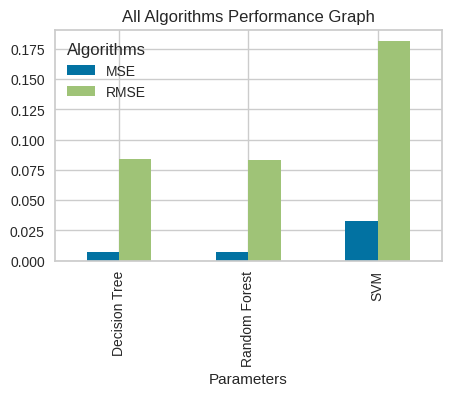

In [ ]:
#plot all algorithm performance
df = pd.DataFrame([
                    ['Decision Tree','MSE',mse[0]],['Decision Tree','RMSE',rmse[0]],
                    ['SVM','MSE',mse[1]],['SVM','RMSE',rmse[1]],
                    ['Random Forest','MSE',mse[2]],['Random Forest','RMSE',rmse[2]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar', figsize=(5,3))
plt.title("All Algorithms Performance Graph")
plt.show()

In [ ]:
#showing all algorithms with scenario A and B performance values
columns = ["Algorithm Name","MSE","RMSE"]
values = []
algorithm_names = ["Decision Tree", "SVM","Random Forest"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],mse[i],rmse[i]])

temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,MSE,RMSE
0,Decision Tree,0.007124,0.084407
1,SVM,0.033030,0.181741
2,Random Forest,0.006907,0.083108


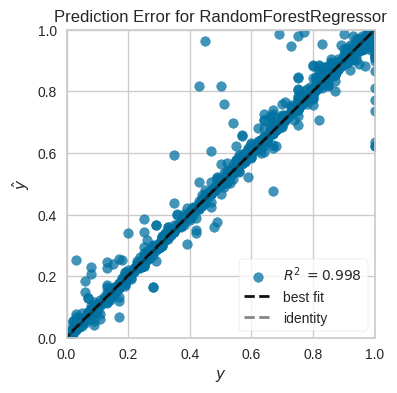

In [ ]:
from yellowbrick.regressor import PredictionError #defining yellow brick class
visualizer = PredictionError(rf_cls)
plt.figure(figsize=(4,4))
visualizer.fit(X_train[0:index], y_train[0:index])  # Fit the training data to the visualizer
visualizer.score(X_test[0:10000], y_test[0:10000])  # Evaluate the model on the test data
g = visualizer.poof()

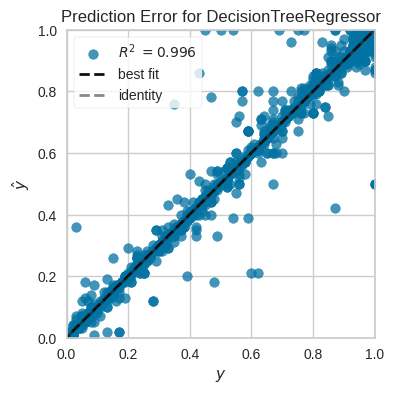

In [ ]:
visualizer = PredictionError(dt_cls)
plt.figure(figsize=(4,4))
visualizer.fit(X_train[0:index], y_train[0:index])  # Fit the training data to the visualizer
visualizer.score(X_test[0:10000], y_test[0:10000])  # Evaluate the model on the test data
g = visualizer.poof()

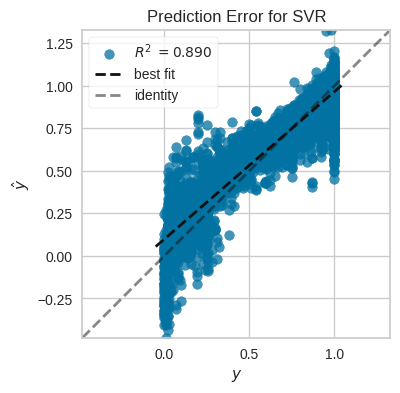

In [ ]:
visualizer = PredictionError(svm_cls)
plt.figure(figsize=(4,4))
visualizer.fit(X_train[0:index], y_train[0:index])  # Fit the training data to the visualizer
visualizer.score(X_test[0:10000], y_test[0:10000])  # Evaluate the model on the test data
g = visualizer.poof()